In [1]:
import altair as alt

In [37]:
cars = alt.load_dataset('cars')

In [38]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


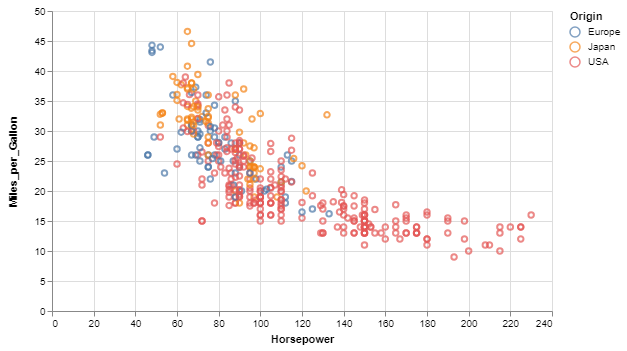

In [6]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).properties(
    width=500,
    height=300
).interactive()

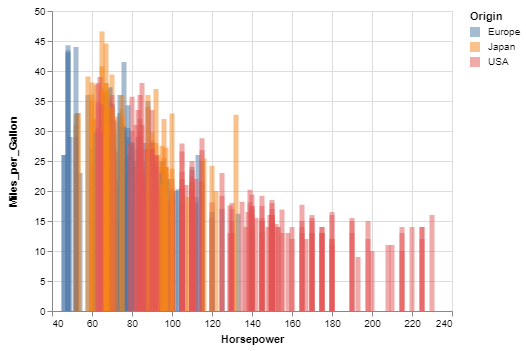

In [10]:
alt.Chart(cars).mark_bar(opacity=0.5).encode(
    x=alt.value(0),
    x2='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()

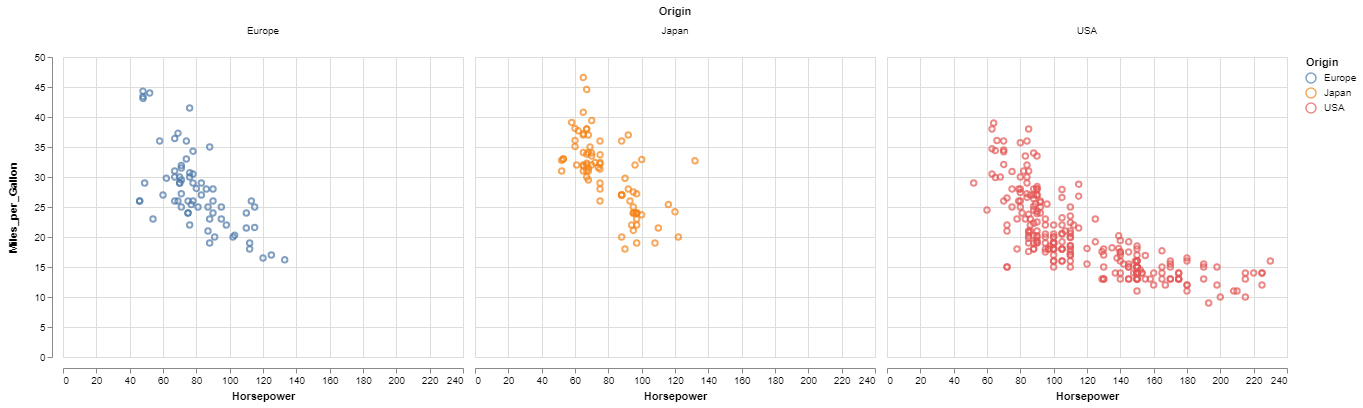

In [17]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).facet(column='Origin:N').interactive()

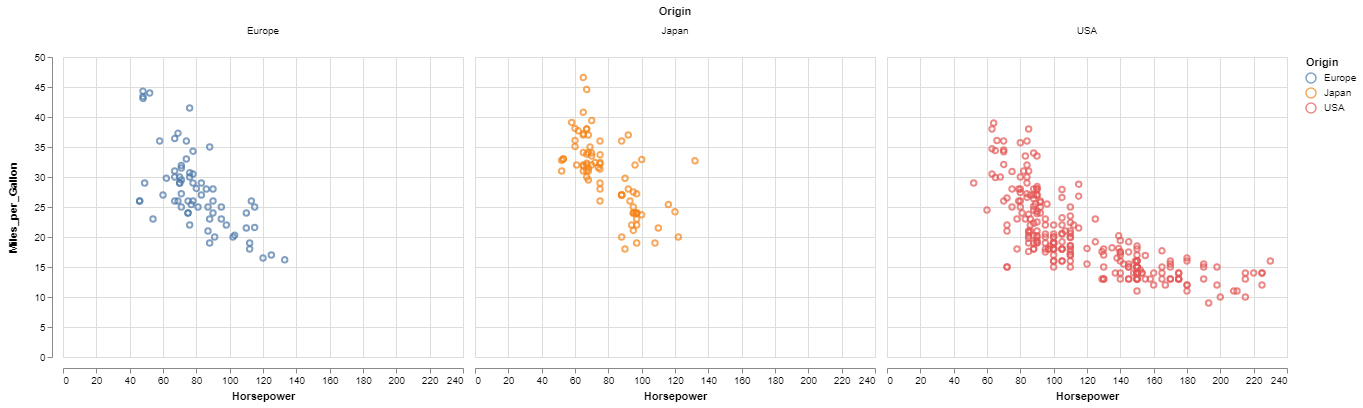

In [19]:
brush=alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).properties(
    selection=brush
).facet(column='Origin:N')

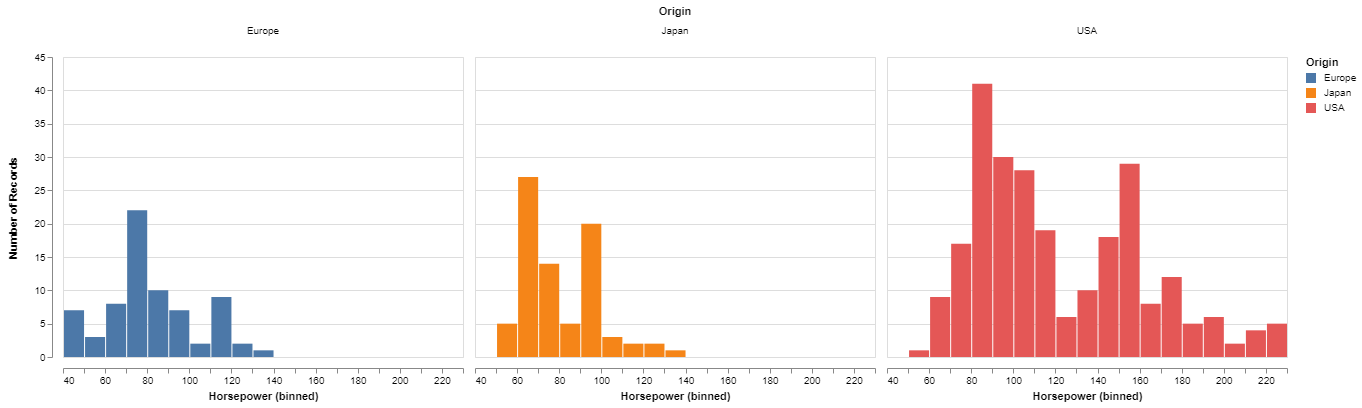

In [21]:
alt.Chart(cars).mark_bar().encode(
    alt.X('Horsepower', bin=alt.BinParams(maxbins=30)),
    y='count(*):Q',
    color='Origin',
).facet(column='Origin:N')

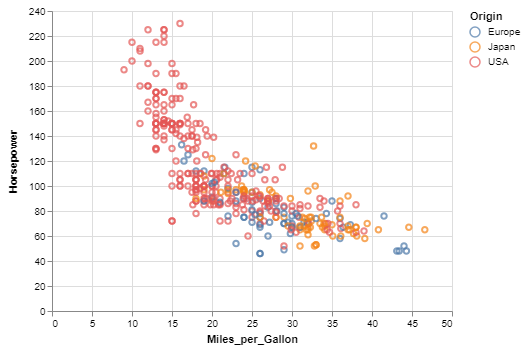

In [22]:
pointer = alt.selection_single(on='mouseover', nearest=True, empty='none')

base = alt.Chart().encode(
    x='Miles_per_Gallon', y='Horsepower'
)

chart = alt.layer(
    base.mark_point().properties(selection=pointer).encode(color='Origin'),
    base.mark_text(dx=8, dy=3, align='left').encode(text=alt.condition(pointer, 'Name', alt.value(''))),
    data=cars
)

chart

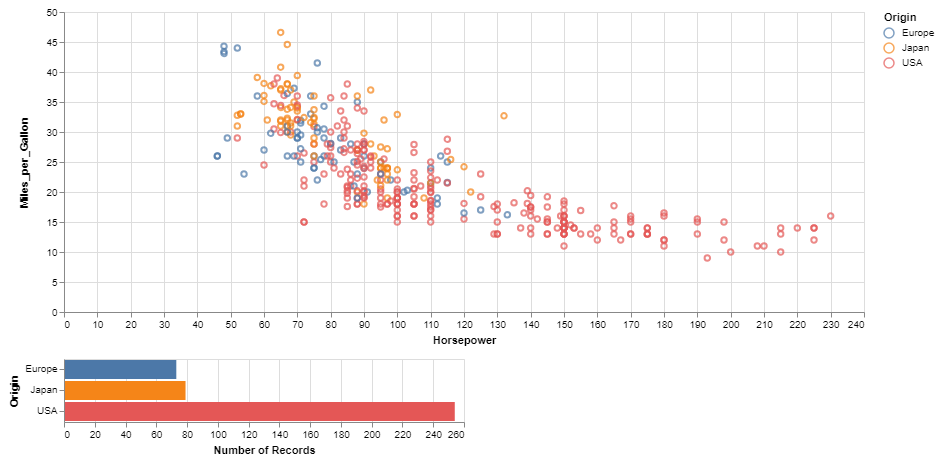

In [23]:
brush = alt.selection(type='interval')

# the top scatterplot
points = alt.Chart().mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.condition(brush, 'Origin:N', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='Origin:N',
    color='Origin:N',
    x='count(Origin):Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
)

chart = alt.vconcat(points, bars, data=cars)
chart

In [72]:
cars = alt.load_dataset('cars')
cars.set_index(['Origin', 'Name'], inplace=True)
cars = cars.sort_index()

In [89]:
order = ['USA', 'Europe', 'Japan']
my_index = pd.MultiIndex(levels=[order,[]],
                             labels=[[],[]],
                             names=['Origin', 'Name'])
df = pd.DataFrame(index=my_index, columns=cars.columns)
df

,,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs,Year
Origin,Name,,,,,,,


In [101]:
df = pd.DataFrame(columns=cars.columns)
for index in order:
    df.loc[index] = cars.loc[index].reset_index()

ValueError: cannot set a row with mismatched columns

In [67]:
cars.set_index('Origin').sort_index()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Weight_in_lbs,Year
Origin,,,,,,,,
Europe,14.7,4,98.0,76.0,41.5,vw rabbit,2144,1980-01-01
Europe,14.0,4,89.0,71.0,31.9,vw rabbit custom,1925,1979-01-01
Europe,20.1,5,183.0,77.0,25.4,mercedes benz 300d,3530,1979-01-01
Europe,24.8,4,141.0,71.0,27.2,peugeot 504,3190,1979-01-01
Europe,14.7,4,91.0,69.0,37.3,fiat strada custom,2130,1979-01-01
Europe,14.0,4,121.0,110.0,24.0,saab 99le,2660,1973-01-01
Europe,15.5,4,121.0,112.0,19.0,volvo 144ea,2868,1973-01-01
Europe,14.0,4,114.0,91.0,20.0,audi 100ls,2582,1973-01-01
Europe,15.5,4,116.0,75.0,24.0,opel manta,2158,1973-01-01


In [56]:
cars.sort_index()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Weight_in_lbs,Year
Origin,,,,,,,,
NaN,15.3,4,101.0,83.0,27.0,renault 12tl,2202,1976-01-01
NaN,16.5,4,98.0,83.0,29.0,audi fox,2219,1974-01-01
NaN,15.5,4,79.0,67.0,26.0,volkswagen dasher,1963,1974-01-01
NaN,14.7,4,91.0,69.0,37.3,fiat strada custom,2130,1979-01-01
NaN,14.5,4,97.0,78.0,26.0,opel manta,2300,1974-01-01
NaN,23.5,4,97.0,54.0,23.0,volkswagen type 3,2254,1972-01-01
NaN,14.7,4,98.0,76.0,41.5,vw rabbit,2144,1980-01-01
NaN,15.5,4,90.0,75.0,24.0,fiat 128,2108,1974-01-01
NaN,14.0,4,116.0,75.0,26.0,fiat 124 tc,2246,1974-01-01
